<a href="https://colab.research.google.com/github/NataSamo/Python-ML/blob/main/Clust3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
import json

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files

In [ ]:
sns.set()

In [ ]:
files.upload()
train = pd.read_json("train.json")
train.head()

Saving train.json to train.json


id      cuisine                                        ingredients
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3  22213       indian                [water, vegetable oil, wheat, salt]
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...

In [ ]:
cuisines = set()
for cuisine in train['cuisine'].values:
  cuisines.add(cuisine)
print(len(cuisines))
cuisines

20


{'brazilian',
 'british',
 'cajun_creole',
 'chinese',
 'filipino',
 'french',
 'greek',
 'indian',
 'irish',
 'italian',
 'jamaican',
 'japanese',
 'korean',
 'mexican',
 'moroccan',
 'russian',
 'southern_us',
 'spanish',
 'thai',
 'vietnamese'}

In [ ]:
train.describe()

id
count  39774.000000
mean   24849.536959
std    14360.035505
min        0.000000
25%    12398.250000
50%    24887.000000
75%    37328.500000
max    49717.000000

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [ ]:
train.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [ ]:
train['ingredients']

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
39769    [light brown sugar, granulated sugar, butter, ...
39770    [KRAFT Zesty Italian Dressing, purple onion, b...
39771    [eggs, citrus fruit, raisins, sourdough starte...
39772    [boneless chicken skinless thigh, minced garli...
39773    [green chile, jalapeno chilies, onions, ground...
Name: ingredients, Length: 39774, dtype: object

In [ ]:
recipe = train.copy()
recipe['ingredients_str'] = recipe['ingredients'].apply(lambda x: ' '.join(x))
recipe['ingredients_str']
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(recipe['ingredients_str'])


In [ ]:
X

<39774x2970 sparse matrix of type '<class 'numpy.float64'>'
	with 751177 stored elements in Compressed Sparse Row format>

In [ ]:
recipe.head()

id      cuisine                                        ingredients  \
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...   
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...   
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3  22213       indian                [water, vegetable oil, wheat, salt]   
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...   

                                     ingredients_str  
0  romaine lettuce black olives grape tomatoes ga...  
1  plain flour ground pepper salt tomatoes ground...  
2  eggs pepper salt mayonaise cooking oil green c...  
3                     water vegetable oil wheat salt  
4  black pepper shallots cornflour cayenne pepper...

In [ ]:
all_ingredients = []
for indiv_ingredient_list in train['ingredients'].values:
    for ingredient in indiv_ingredient_list:
        all_ingredients.append(ingredient)
ingredients_together = pd.DataFrame(all_ingredients)
ingredients_together.value_counts()[0:10]

salt                   18049
olive oil               7972
onions                  7972
water                   7457
garlic                  7380
sugar                   6434
garlic cloves           6237
butter                  4848
ground black pepper     4785
all-purpose flour       4632
Name: count, dtype: int64

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
recipe['cluster'] = kmeans.labels_

In [ ]:
for i in range(2):
    print(f'Кластер {i}:')
    print(recipe[recipe['cluster'] == i]['cuisine'].tolist())

Кластер 0:
['jamaican', 'italian', 'british', 'southern_us', 'mexican', 'chinese', 'southern_us', 'southern_us', 'japanese', 'french', 'spanish', 'vietnamese', 'southern_us', 'italian', 'italian', 'southern_us', 'southern_us', 'mexican', 'irish', 'irish', 'italian', 'japanese', 'british', 'spanish', 'british', 'mexican', 'southern_us', 'italian', 'greek', 'japanese', 'italian', 'indian', 'southern_us', 'british', 'italian', 'indian', 'french', 'irish', 'southern_us', 'french', 'french', 'italian', 'southern_us', 'southern_us', 'italian', 'southern_us', 'southern_us', 'southern_us', 'french', 'southern_us', 'british', 'italian', 'southern_us', 'vietnamese', 'mexican', 'southern_us', 'french', 'french', 'filipino', 'irish', 'french', 'british', 'brazilian', 'mexican', 'russian', 'southern_us', 'irish', 'southern_us', 'mexican', 'mexican', 'irish', 'mexican', 'french', 'southern_us', 'southern_us', 'italian', 'southern_us', 'british', 'italian', 'mexican', 'italian', 'southern_us', 'greek

In [ ]:
for i in range(2):
    print(f'Кластер {i}:')
    cluster_df = recipe[recipe['cluster'] == i]
    ingredients = ' '.join(cluster_df['ingredients_str']).split()
    top_ingredients = Counter(ingredients).most_common(5)
    print('5 популярных ингридиентов:', ', '.join([x[0] for x in top_ingredients]))

Кластер 0:
5 популярных ингридиентов: sugar, flour, salt, butter, eggs
Кластер 1:
5 популярных ингридиентов: pepper, oil, salt, garlic, fresh


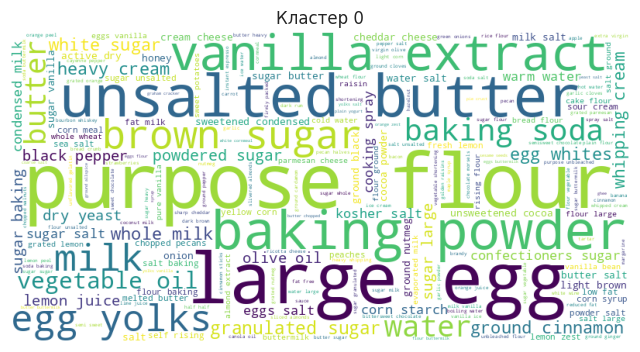

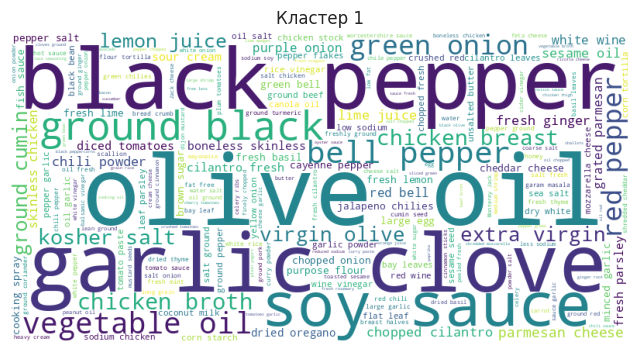

In [ ]:
for i in range(2):
    cluster_words = ' '.join(recipe[recipe['cluster'] == i]['ingredients_str'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_words)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Кластер {i}')
    plt.show()

In [ ]:
silhouette_KMeans = silhouette_score(X, kmeans.labels_)
print("Коэффициент силуэта для KMeans - ", silhouette_KMeans)

Коэффициент силуэта для KMeans -  0.02319004312330927


In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(X)
recipe['cluster3'] = kmeans3.labels_


for i in range(3):
    print(f'Кластер {i}:')
    cluster_df = recipe[recipe['cluster3'] == i]
    ingredients = ' '.join(cluster_df['ingredients_str']).split()
    top_ingredients = Counter(ingredients).most_common(5)
    print('5 популярных ингридиентов:', ', '.join([x[0] for x in top_ingredients]))


silhouette_KMeans3 = silhouette_score(X, kmeans3.labels_)
print("Коэффициент силуэта для KMeans - ", silhouette_KMeans3)

Кластер 0:
5 популярных ингридиентов: sugar, flour, salt, butter, eggs
Кластер 1:
5 популярных ингридиентов: sauce, oil, soy, garlic, pepper
Кластер 2:
5 популярных ингридиентов: pepper, salt, oil, ground, garlic
Коэффициент силуэта для KMeans -  0.01945554391119388


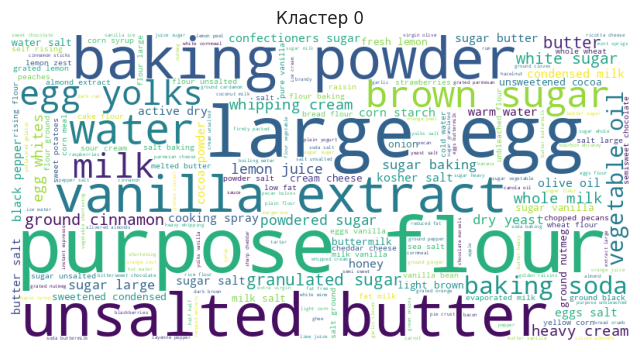

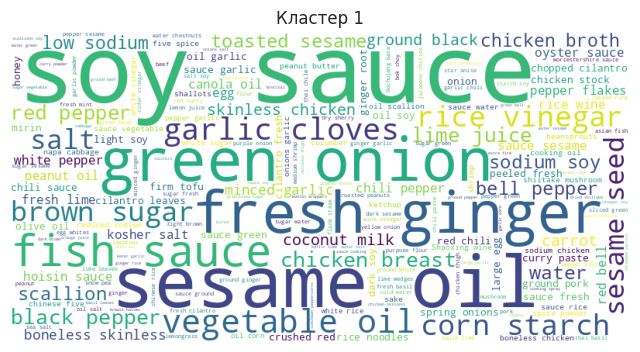

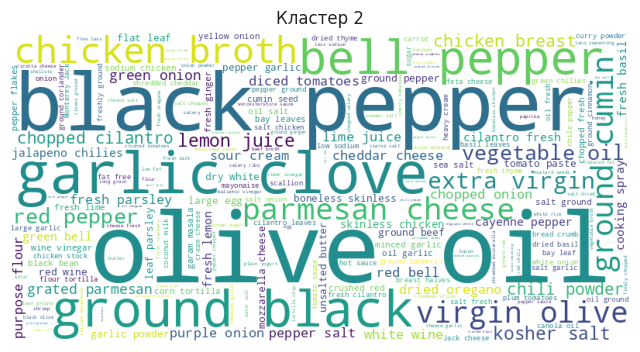

In [ ]:
for i in range(3):
    cluster_words = ' '.join(recipe[recipe['cluster3'] == i]['ingredients_str'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_words)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Кластер {i}')
    plt.show()

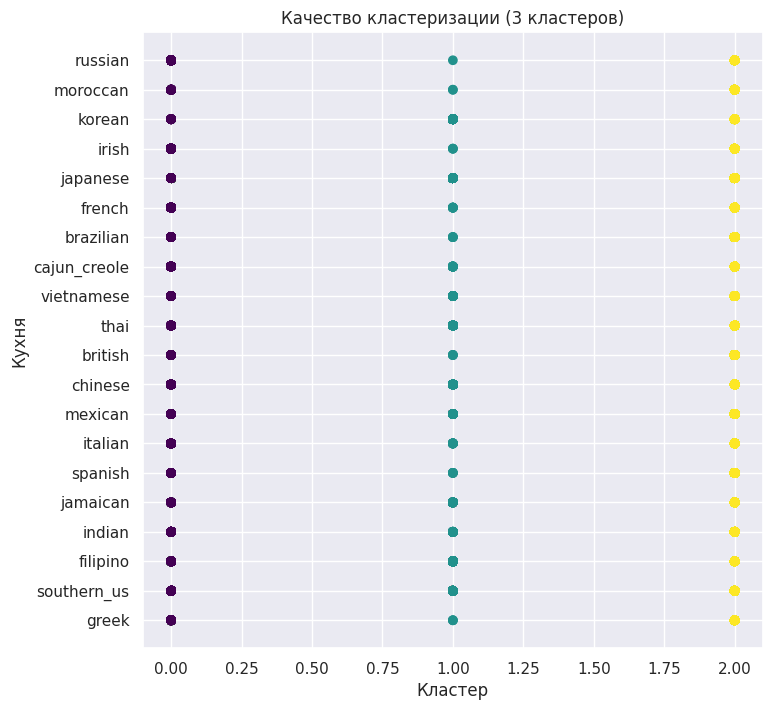

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(recipe['cluster3'], recipe['cuisine'], c=recipe['cluster3'], cmap='viridis')
plt.title(f'Качество кластеризации ({3} кластеров)')
plt.xlabel('Кластер')
plt.ylabel('Кухня')
plt.show()

In [ ]:
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(X)
recipe['cluster5'] = kmeans5.labels_


for i in range(5):
    print(f'Кластер {i}:')
    cluster_df = recipe[recipe['cluster5'] == i]
    ingredients = ' '.join(cluster_df['ingredients_str']).split()
    top_ingredients = Counter(ingredients).most_common(5)
    cuisines = ' '.join(cluster_df['cuisine']).split()
    top_cuisine = Counter(cuisines).most_common(5)
    print('5 популярных ингридиентов:', ', '.join([x[0] for x in top_ingredients]))
    print('5 популярных кухонь:', ', '.join([x[0] for x in top_cuisine]))


silhouette_KMeans5 = silhouette_score(X, kmeans5.labels_)
print("Коэффициент силуэта для KMeans - ", silhouette_KMeans5)

Кластер 0:
5 популярных ингридиентов: cheese, salt, pepper, oil, onions
5 популярных кухонь: mexican, italian, southern_us, french, cajun_creole
Кластер 1:
5 популярных ингридиентов: sauce, oil, soy, garlic, pepper
5 популярных кухонь: chinese, thai, japanese, korean, vietnamese
Кластер 2:
5 популярных ингридиентов: ground, pepper, salt, garlic, fresh
5 популярных кухонь: mexican, indian, moroccan, thai, southern_us
Кластер 3:
5 популярных ингридиентов: pepper, oil, olive, fresh, salt
5 популярных кухонь: italian, french, greek, cajun_creole, spanish
Кластер 4:
5 популярных ингридиентов: sugar, flour, salt, butter, eggs
5 популярных кухонь: southern_us, french, italian, british, mexican
Коэффициент силуэта для KMeans -  0.019093405792490484


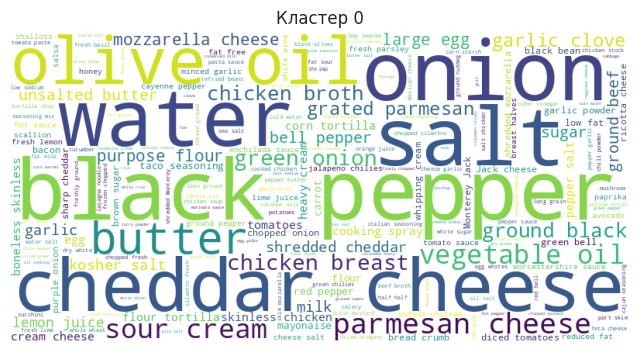

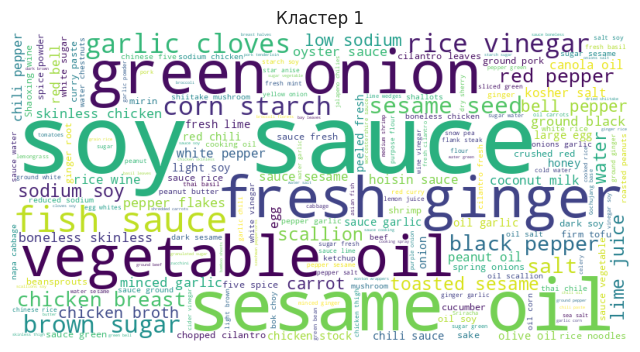

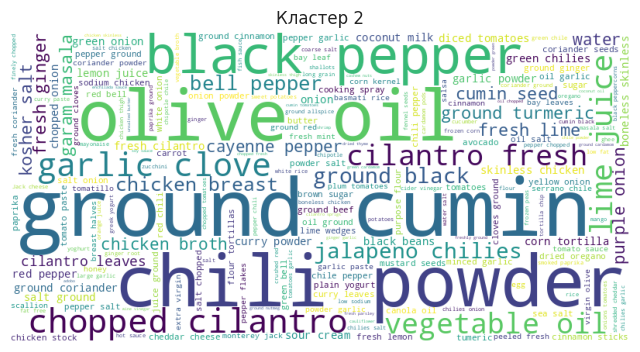

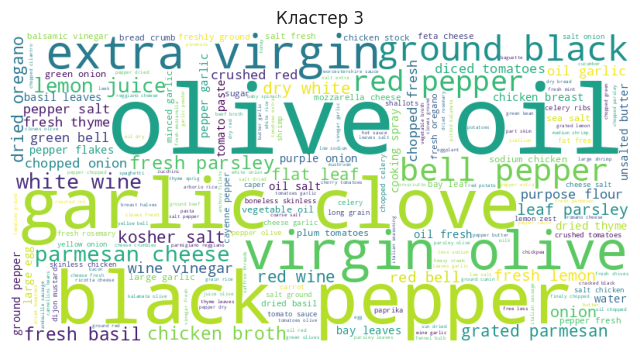

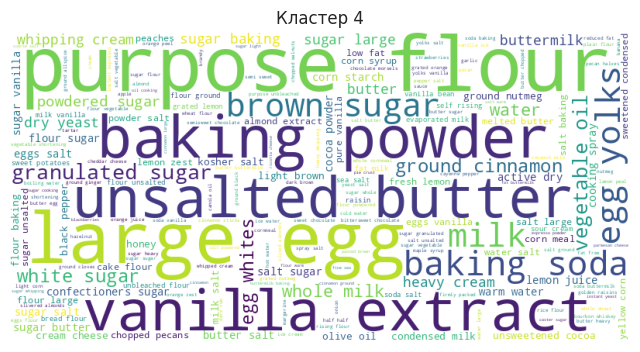

In [ ]:
for i in range(5):
    cluster_words = ' '.join(recipe[recipe['cluster5'] == i]['ingredients_str'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_words)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Кластер {i}')
    plt.show()

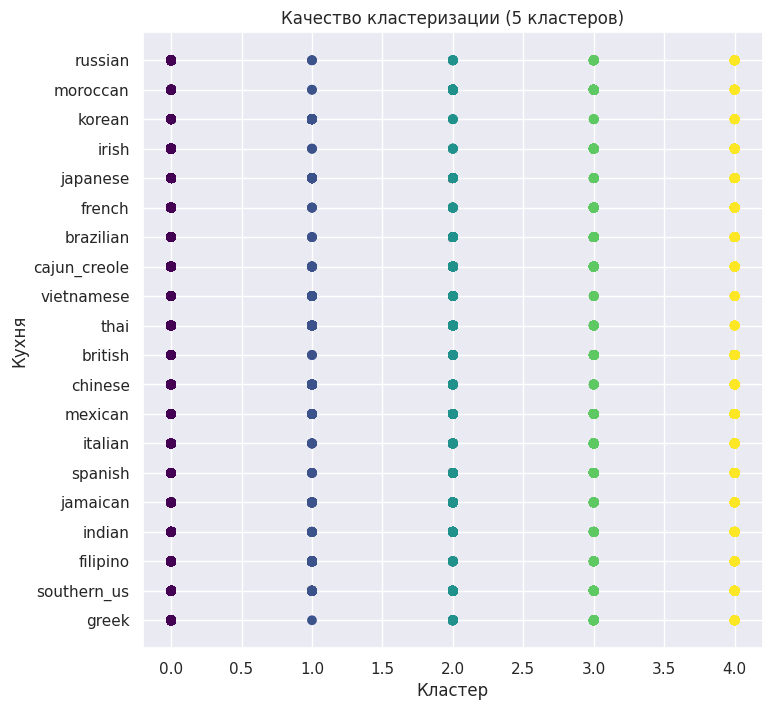

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(recipe['cluster5'], recipe['cuisine'], c=recipe['cluster5'], cmap='viridis')
plt.title(f'Качество кластеризации ({5} кластеров)')
plt.xlabel('Кластер')
plt.ylabel('Кухня')
plt.show()

In [ ]:
kmeans7 = KMeans(n_clusters=7, random_state=42)
kmeans7.fit(X)
recipe['cluster7'] = kmeans7.labels_


for i in range(7):
    print(f'Кластер {i}:')
    cluster_df = recipe[recipe['cluster7'] == i]
    ingredients = ' '.join(cluster_df['ingredients_str']).split()
    top_ingredients = Counter(ingredients).most_common(5)
    cuisines = ' '.join(cluster_df['cuisine']).split()
    top_cuisine = Counter(cuisines).most_common(5)
    print('5 популярных ингридиентов:', ', '.join([x[0] for x in top_ingredients]))
    print('5 популярных кухонь:', ', '.join([x[0] for x in top_cuisine]))


silhouette_KMeans7 = silhouette_score(X, kmeans7.labels_)
print("Коэффициент силуэта для KMeans - ", silhouette_KMeans7)

Кластер 0:
5 популярных ингридиентов: pepper, oil, salt, olive, fresh
5 популярных кухонь: italian, cajun_creole, french, greek, spanish
Кластер 1:
5 популярных ингридиентов: sauce, oil, soy, garlic, pepper
5 популярных кухонь: chinese, thai, japanese, korean, vietnamese
Кластер 2:
5 популярных ингридиентов: ground, salt, pepper, oil, garlic
5 популярных кухонь: indian, mexican, moroccan, thai, jamaican
Кластер 3:
5 популярных ингридиентов: cheese, parmesan, pepper, salt, grated
5 популярных кухонь: italian, southern_us, french, greek, mexican
Кластер 4:
5 популярных ингридиентов: sugar, flour, salt, butter, eggs
5 популярных кухонь: southern_us, french, italian, british, mexican
Кластер 5:
5 популярных ингридиентов: pepper, cheese, salt, cilantro, ground
5 популярных кухонь: mexican, southern_us, italian, spanish, cajun_creole
Кластер 6:
5 популярных ингридиентов: salt, pepper, oil, sugar, water
5 популярных кухонь: southern_us, italian, mexican, french, indian
Коэффициент силуэта для

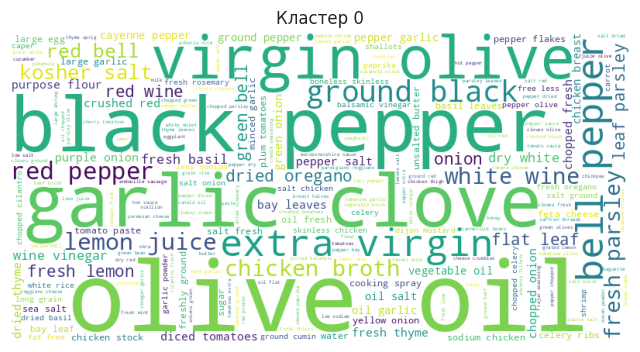

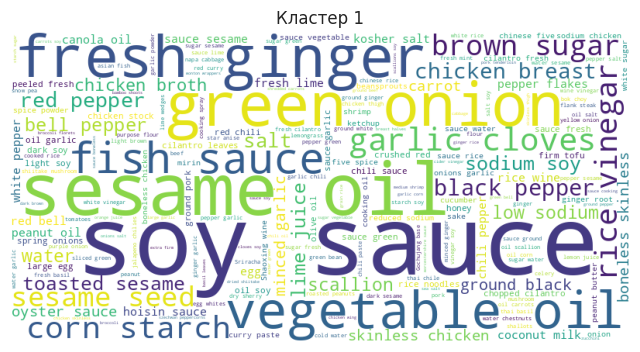

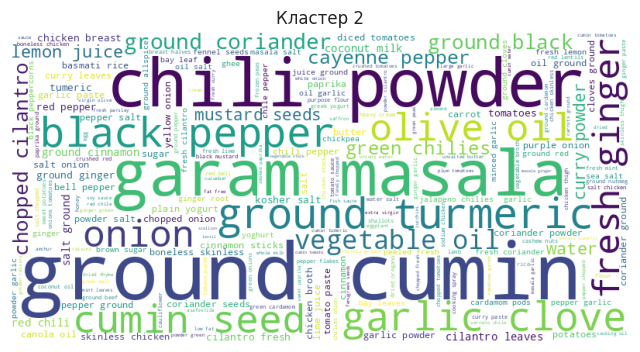

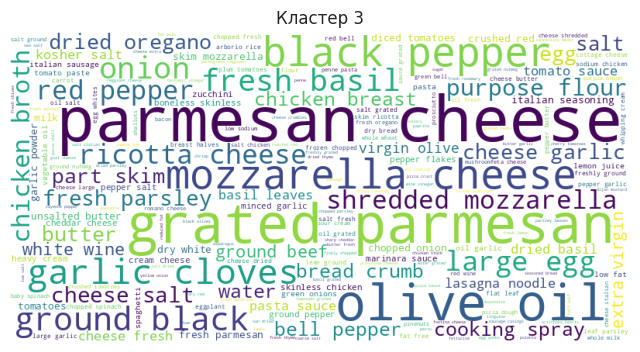

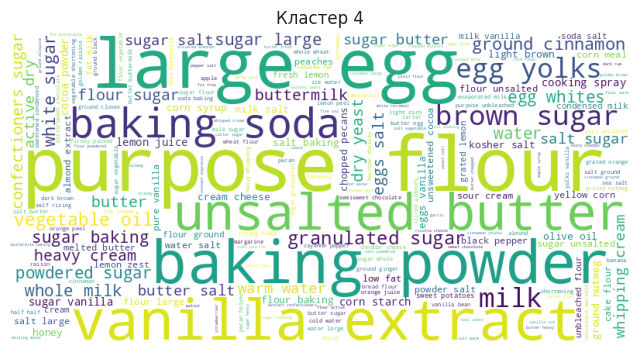

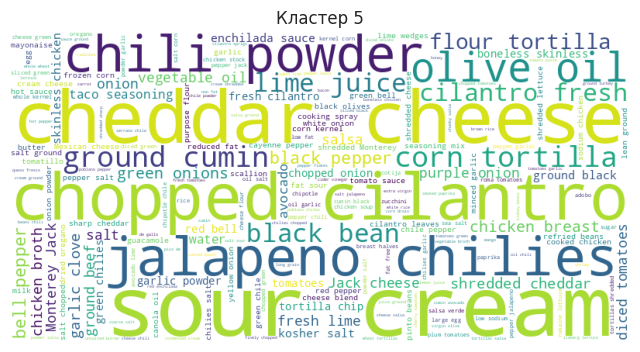

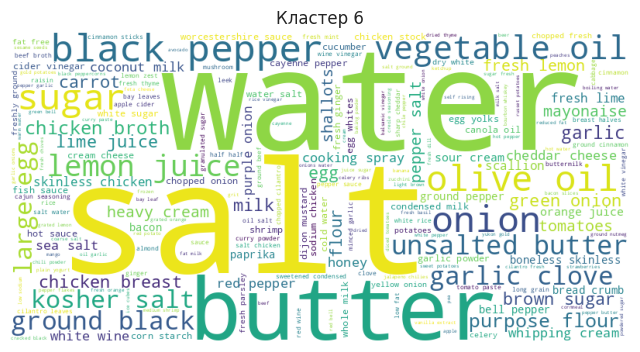

In [ ]:
for i in range(7):
    cluster_words = ' '.join(recipe[recipe['cluster7'] == i]['ingredients_str'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_words)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Кластер {i}')
    plt.show()

In [ ]:
kmeans10 = KMeans(n_clusters=10, random_state=42)
kmeans10.fit(X)
recipe['cluster10'] = kmeans10.labels_


for i in range(10):
    print(f'Кластер {i}:')
    cluster_df = recipe[recipe['cluster10'] == i]
    ingredients = ' '.join(cluster_df['ingredients_str']).split()
    top_ingredients = Counter(ingredients).most_common(5)
    cuisines = ' '.join(cluster_df['cuisine']).split()
    top_cuisine = Counter(cuisines).most_common(5)
    print('5 популярных ингридиентов:', ', '.join([x[0] for x in top_ingredients]))
    print('5 популярных кухонь:', ', '.join([x[0] for x in top_cuisine]))


silhouette_KMeans10 = silhouette_score(X, kmeans10.labels_)
print("Коэффициент силуэта для KMeans - ", silhouette_KMeans10)

Кластер 0:
5 популярных ингридиентов: flour, sugar, salt, all-purpose, butter
5 популярных кухонь: southern_us, italian, french, british, irish
Кластер 1:
5 популярных ингридиентов: sauce, garlic, oil, soy, fresh
5 популярных кухонь: thai, chinese, vietnamese, japanese, filipino
Кластер 2:
5 популярных ингридиентов: ground, salt, oil, cumin, garlic
5 популярных кухонь: indian, moroccan, mexican, japanese, thai
Кластер 3:
5 популярных ингридиентов: pepper, cheese, salt, cilantro, ground
5 популярных кухонь: mexican, southern_us, indian, italian, spanish
Кластер 4:
5 популярных ингридиентов: cheese, parmesan, pepper, salt, grated
5 популярных кухонь: italian, southern_us, french, greek, mexican
Кластер 5:
5 популярных ингридиентов: pepper, salt, garlic, ground, oil
5 популярных кухонь: italian, cajun_creole, southern_us, mexican, french
Кластер 6:
5 популярных ингридиентов: chicken, boneless, skinless, pepper, oil
5 популярных кухонь: mexican, italian, chinese, thai, indian
Кластер 7:
5 

In [ ]:
kmeans8 = KMeans(n_clusters=8, random_state=42)
kmeans8.fit(X)
recipe['cluster8'] = kmeans10.labels_


for i in range(8):
    print(f'Кластер {i}:')
    cluster_df = recipe[recipe['cluster8'] == i]
    ingredients = ' '.join(cluster_df['ingredients_str']).split()
    top_ingredients = Counter(ingredients).most_common(5)
    cuisines = ' '.join(cluster_df['cuisine']).split()
    top_cuisine = Counter(cuisines).most_common(5)
    print('5 популярных ингридиентов:', ', '.join([x[0] for x in top_ingredients]))
    print('5 популярных кухонь:', ', '.join([x[0] for x in top_cuisine]))


silhouette_KMeans8 = silhouette_score(X, kmeans8.labels_)
print("Коэффициент силуэта для KMeans - ", silhouette_KMeans10)

Кластер 0:
5 популярных ингридиентов: flour, sugar, salt, all-purpose, butter
5 популярных кухонь: southern_us, italian, french, british, irish
Кластер 1:
5 популярных ингридиентов: sauce, garlic, oil, soy, fresh
5 популярных кухонь: thai, chinese, vietnamese, japanese, filipino
Кластер 2:
5 популярных ингридиентов: ground, salt, oil, cumin, garlic
5 популярных кухонь: indian, moroccan, mexican, japanese, thai
Кластер 3:
5 популярных ингридиентов: pepper, cheese, salt, cilantro, ground
5 популярных кухонь: mexican, southern_us, indian, italian, spanish
Кластер 4:
5 популярных ингридиентов: cheese, parmesan, pepper, salt, grated
5 популярных кухонь: italian, southern_us, french, greek, mexican
Кластер 5:
5 популярных ингридиентов: pepper, salt, garlic, ground, oil
5 популярных кухонь: italian, cajun_creole, southern_us, mexican, french
Кластер 6:
5 популярных ингридиентов: chicken, boneless, skinless, pepper, oil
5 популярных кухонь: mexican, italian, chinese, thai, indian
Кластер 7:
5 

0.019954728442419665
0.017626165498721237
0.01936236333438682
0.018430557139200505
0.018201893976703746
0.01850050682584684
0.01901505839025223
0.019365827524373675
0.019486711029197638
0.019740268429448746


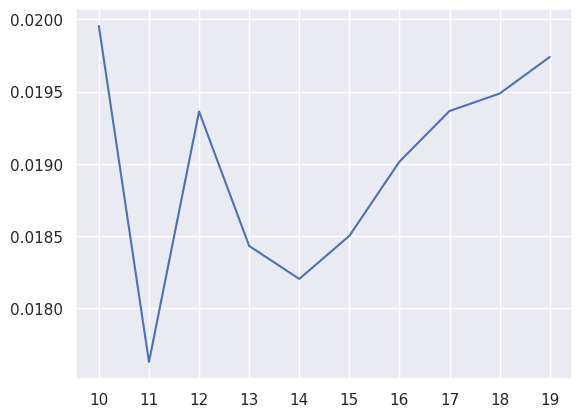

In [ ]:
res = []
for i in range(10, 20):  # Количество кластеров
    alg = KMeans(n_clusters=i, n_init='auto', random_state=19)
    y_clust = alg.fit_predict(X)
    s = silhouette_score(X, y_clust)
    print(s)
    res.append(s)
sns.lineplot(x=map(str, range(10, 20)), y=res);

In [ ]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X.toarray())
recipe['agg_cluster'] = agg_clustering.labels_
silhouette_avg = silhouette_score(X, recipe['agg_cluster'])
print(f'Иерархическая кластеризация: Коэффициент силуэта: {silhouette_avg}')

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(X)
recipe['dbscan_cluster'] = dbscan.labels_
silhouette_avg = silhouette_score(X, recipe['dbscan_cluster'], metric='euclidean')
print(f'DBSCAN: Коэффициент силуэта: {silhouette_avg}')

DBSCAN: Коэффициент силуэта: -0.03146017020115394


In [ ]:
recipe_train = recipe.copy()
recipe_train['ingredients_str'] = recipe_train['ingredients'].apply(lambda x: ' '.join(x))
recipe_train = recipe_train.drop(columns = ['cuisine','ingredients','id'],axis = 1)
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit(recipe_train['ingredients_str'])
X_train = X1.transform(recipe_train['ingredients_str'])
print(X_train)
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(X_train)

  (0, 179)	0.20748802168948122
  (0, 242)	0.1398962004921347
  (0, 515)	0.14568369866765699
  (0, 730)	0.3343204746101372
  (0, 948)	0.3040361765035925
  (0, 1073)	0.38853112215987895
  (0, 1079)	0.10531073154596084
  (0, 1154)	0.35031170238526027
  (0, 1508)	0.2663871237012894
  (0, 1845)	0.26100924108701357
  (0, 1847)	0.1645493089953018
  (0, 1970)	0.10208411357610164
  (0, 2153)	0.23913220198081458
  (0, 2267)	0.3426671291173114
  (0, 2375)	0.23007896012035983
  (0, 2735)	0.15183517837377775
  (1, 242)	0.167252325252206
  (1, 668)	0.21827079430851282
  (1, 888)	0.19924115060270703
  (1, 1001)	0.181756249977886
  (1, 1175)	0.18772612842727066
  (1, 1189)	0.29826593091288783
  (1, 1646)	0.39840435681165925
  (1, 1687)	0.20955261084571736
  (1, 1837)	0.11553051231205463
  :	:
  (39772, 2874)	0.2462722385747022
  (39772, 2905)	0.09756663475317282
  (39772, 2907)	0.1632068359158595
  (39772, 2915)	0.11200715154903165
  (39773, 199)	0.22131499002761051
  (39773, 242)	0.15383782851543704


KMeans(n_clusters=20, random_state=42)

In [ ]:
recipe_train

ingredients_str
0      romaine lettuce black olives grape tomatoes ga...
1      plain flour ground pepper salt tomatoes ground...
2      eggs pepper salt mayonaise cooking oil green c...
3                         water vegetable oil wheat salt
4      black pepper shallots cornflour cayenne pepper...
...                                                  ...
39769  light brown sugar granulated sugar butter warm...
39770  KRAFT Zesty Italian Dressing purple onion broc...
39771  eggs citrus fruit raisins sourdough starter fl...
39772  boneless chicken skinless thigh minced garlic ...
39773  green chile jalapeno chilies onions ground bla...

[39774 rows x 1 columns]

In [ ]:
kmeans20 = KMeans(n_clusters=20, random_state=42)
kmeans20.fit(X)
recipe['cluster20'] = kmeans20.labels_

In [ ]:
files.upload()
recipe_test = pd.read_json("test.json")

recipe_test['ingredients_str'] = recipe_test['ingredients'].apply(lambda x: ' '.join(x))
recipe_test = recipe_test.drop(columns = ['ingredients','id'],axis = 1)
vectorizer = TfidfVectorizer(stop_words='english')
X_test = X1.transform(recipe_test['ingredients_str'])


Saving test.json to test (1).json


In [ ]:
print(recipe_test)

                                        ingredients_str
0     baking powder eggs all-purpose flour raisins m...
1     sugar egg yolks corn starch cream of tartar ba...
2     sausage links fennel bulb fronds olive oil cub...
3     meat cuts file powder smoked sausage okra shri...
4     ground black pepper salt sausage casings leeks...
...                                                 ...
9939  large egg yolks fresh lemon juice sugar bourbo...
9940   hot sauce butter sweet potatoes adobo sauce salt
9941  black pepper salt parmigiano reggiano cheese r...
9942  cheddar cheese cayenne paprika plum tomatoes g...
9943  cold water olive oil lime wedges garlic cloves...

[9944 rows x 1 columns]


In [ ]:
kmeans20 = KMeans(n_clusters=20, random_state=42)
kmeans20.fit(X)
recipe['cluster20'] = kmeans20.labels_

In [ ]:
pred = kmeans.predict(X_test)

In [ ]:
len(pred)

9944

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(recipe['cuisine'])

LabelEncoder()

In [ ]:
recipe

id      cuisine                                        ingredients  \
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...   
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...   
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3      22213       indian                [water, vegetable oil, wheat, salt]   
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...   
...      ...          ...                                                ...   
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...   
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...   
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...   
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...   
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...   

                                         ingredients_str  
0      romaine lettuce black olives grape tomatoes ga...  
1      plain flour ground pepper salt tomatoes ground...  
2      eggs pepper salt mayonaise cooking oil green c...  
3                         water vegetable oil wheat salt  
4      black pepper shallots cornflour cayenne pepper...  
...                                                  ...  
39769  light brown sugar granulated sugar butter warm...  
39770  KRAFT Zesty Italian Dressing purple onion broc...  
39771  eggs citrus fruit raisins sourdough starter fl...  
39772  boneless chicken skinless thigh minced garlic ...  
39773  green chile jalapeno chilies onions ground bla...  

[39774 rows x 4 columns]

In [ ]:
recipe_test = encoder.transform(recipe['cuisine'])

In [ ]:
len(recipe_test)

39774

In [ ]:
pred = kmeans.predict(X_train)

In [ ]:
len(kmeans.labels_)

39774

In [ ]:
silhouette_avg = silhouette_score(X_test, pred)
silhouette_avg

0.020860698155097616

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(recipe_test, pred)
count_correct = int(accuracy * len(recipe_test))
print("Количество совпадений:", count_correct)

Количество совпадений: 973


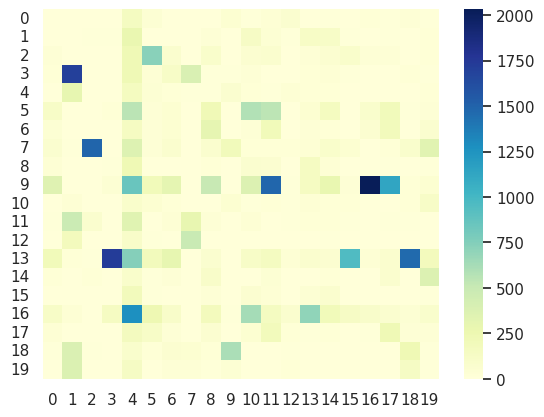

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(recipe_test, pred)

sns.set()
sns.heatmap(cm, fmt='d', cmap='YlGnBu')
plt.show()